# CNN on MNIST

# 1. Data preprocessing

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from tensorflow.keras.datasets import mnist

In [6]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [7]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
y_train.shape

(60000,)

In [11]:
x_test.shape

(10000, 28, 28)

In [12]:
y_test.shape

(10000,)

In [13]:
single_image = x_train[0]

In [14]:
single_image.shape

(28, 28)

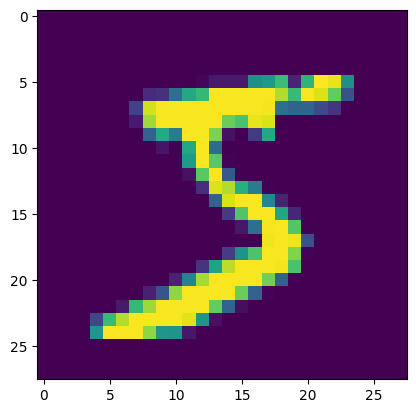

In [15]:
plt.imshow(single_image)

In [16]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
y_train.shape

(60000,)

In [19]:
y_example = to_categorical(y_train)

In [20]:
y_example.shape

(60000, 10)

In [21]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [22]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [24]:
y_cat_train = to_categorical(y_train,10)

In [25]:
single_image.max()

255

In [26]:
single_image.min()

0

In [27]:
x_train = x_train/255

In [28]:
x_test = x_test/255

In [29]:
scaled_image = x_train[0]

In [30]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

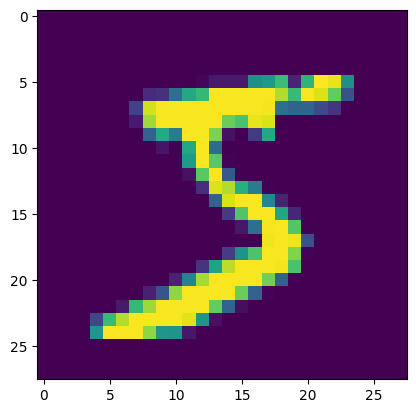

In [31]:
plt.imshow(scaled_image)

In [32]:
x_train.shape

(60000, 28, 28)

In [33]:
# batch_size, width, height, color_channels
x_train = x_train.reshape(60000,28,28,1)

In [34]:
x_test = x_test.reshape(10000,28,28,1)

# 2. Model Training

In [35]:
from tensorflow.keras.models import Sequential

In [37]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [38]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# 28*28 = 784
model.add(Flatten())
model.add(Dense(128,activation='relu'))
# OUTPUT LAYER SOFTMAX --> MULTI CLASS
model.add(Dense(10,activation='softmax'))

# keras.io/metrics

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

2023-05-27 17:11:49.388846: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
2023-05-27 17:11:49.434040: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2400000000 Hz
2023-05-27 17:11:49.438684: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5473f50 executing computations on platform Host. Devices:
2023-05-27 17:11:49.438720: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version


In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [42]:
model.fit(x_train,y_cat_train,epochs = 10,validation_data = (x_test,y_cat_test),callbacks=[early_stop])

2023-05-27 17:18:29.367556: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 376320000 exceeds 10% of system memory.
2023-05-27 17:18:29.603581: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 62720000 exceeds 10% of system memory.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 27s 458us/sample - loss: 0.1347 - accuracy: 0.9601 - val_loss: 0.0538 - val_accuracy: 0.9825
Epoch 2/10
60000/60000 [==============================] - 29s 479us/sample - loss: 0.0459 - accuracy: 0.9855 - val_loss: 0.0416 - val_accuracy: 0.9856
Epoch 3/10
60000/60000 [==============================] - 28s 463us/sample - loss: 0.0294 - accuracy: 0.9904 - val_loss: 0.0415 - val_accuracy: 0.9858
Epoch 4/10
60000/60000 [==============================] - 32s 534us/sample - loss: 0.0183 - accuracy: 0.9943 - val_loss: 0.0375 - val_accuracy: 0.9869
Epoch 5/10
60000/60000 [==============================] - 23s 382us/sample - loss: 0.0142 - accuracy: 0.9951 - val_loss: 0.0404 - val_accuracy: 0.9877


# 3. Model Evaluation

In [43]:
metrics = pd.DataFrame(model.history.history)

In [44]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.134735,0.960100,0.053833,0.9825
1,0.045937,0.985500,0.041638,0.9856
2,0.029368,0.990400,0.041475,0.9858
3,0.018348,0.994317,0.037454,0.9869
4,0.014174,0.995117,0.040358,0.9877


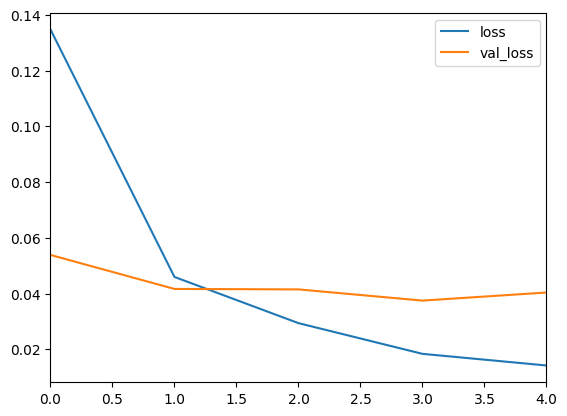

In [45]:
metrics[['loss','val_loss']].plot()

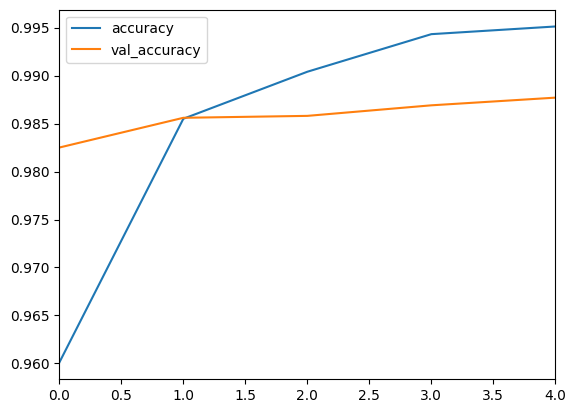

In [46]:
metrics[['accuracy','val_accuracy']].plot()

In [47]:
model.metrics_names

['loss', 'accuracy']

In [49]:
model.evaluate(x_test,y_cat_test,verbose=0)

2023-05-27 17:24:15.429699: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 62720000 exceeds 10% of system memory.


[0.04035766075687461, 0.9877]

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
predictions = model.predict_classes(x_test)

2023-05-27 17:25:40.027414: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 62720000 exceeds 10% of system memory.


In [52]:
y_cat_test.shape

(10000, 10)

In [53]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [54]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [55]:
confusion_matrix(y_test,predictions)

array([[ 975,    0,    0,    1,    0,    2,    1,    0,    1,    0],
       [   0, 1123,    4,    0,    0,    0,    1,    2,    5,    0],
       [   1,    0, 1017,    0,    1,    0,    2,    5,    6,    0],
       [   0,    0,    0, 1001,    0,    3,    0,    1,    5,    0],
       [   0,    0,    1,    0,  970,    0,    3,    0,    1,    7],
       [   1,    0,    0,    5,    0,  883,    1,    0,    2,    0],
       [   5,    2,    0,    1,    1,    3,  940,    0,    6,    0],
       [   0,    1,    5,    0,    0,    0,    0, 1018,    2,    2],
       [   2,    0,    1,    1,    0,    1,    0,    2,  965,    2],
       [   3,    0,    1,    3,    4,    6,    0,    3,    4,  985]])

In [56]:
import seaborn as sns

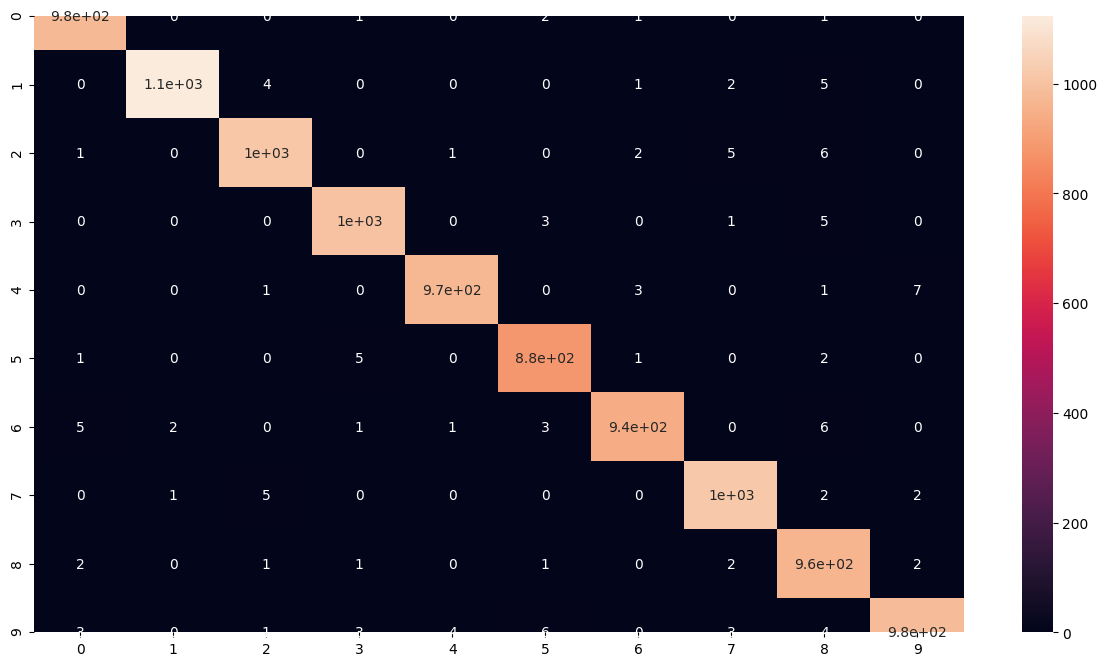

In [64]:
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [65]:
my_number = x_test[0]

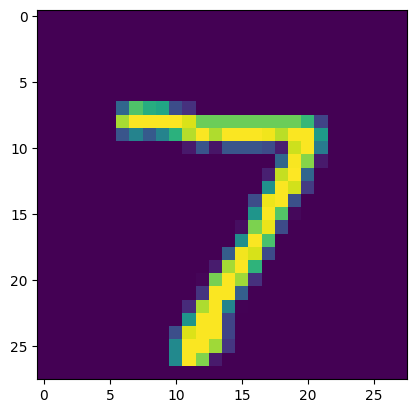

In [66]:
plt.imshow(my_number.reshape(28,28))

In [67]:
# num_images, width, height, color_channels
model.predict_classes(my_number.reshape(1,28,28,1))

array([7])

# CNN on CIFAR-10

# 1. Data preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 67s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
x_train[0].shape

(32, 32, 3)

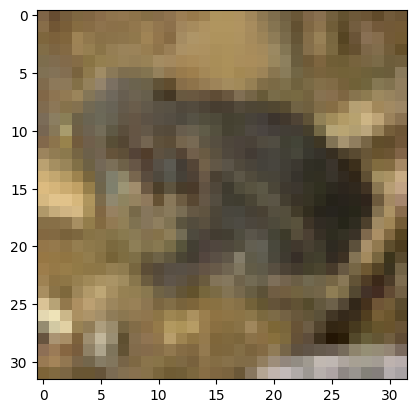

In [8]:
plt.imshow(x_train[23])

In [9]:
x_train = x_train/255

In [10]:
x_test = x_test/255

In [11]:
x_test.shape

(10000, 32, 32, 3)

In [12]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,num_classes=10)

# 2. Model Training

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [16]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 28*28 = 784
model.add(Flatten())
model.add(Dense(256,activation='relu'))
# OUTPUT LAYER SOFTMAX --> MULTI CLASS
model.add(Dense(10,activation='softmax'))

# keras.io/metrics

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

2023-05-28 07:25:33.285241: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
2023-05-28 07:25:33.328936: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2400000000 Hz
2023-05-28 07:25:33.329961: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x36ddce0 executing computations on platform Host. Devices:
2023-05-28 07:25:33.329981: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [19]:
model.fit(x_train,y_cat_train,epochs = 15,validation_data = (x_test,y_cat_test),callbacks=[early_stop])

2023-05-28 07:27:28.720510: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 1228800000 exceeds 10% of system memory.
2023-05-28 07:27:36.046505: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 245760000 exceeds 10% of system memory.


Train on 50000 samples, validate on 10000 samples
Epoch 1/15
  128/50000 [..............................] - ETA: 48:17 - loss: 2.2636 - accuracy: 0.1641  

2023-05-28 07:27:44.293778: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 23789568 exceeds 10% of system memory.
2023-05-28 07:27:44.293947: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 23789568 exceeds 10% of system memory.
2023-05-28 07:27:44.310077: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 18569280 exceeds 10% of system memory.


50000/50000 [==============================] - 60s 1ms/sample - loss: 1.5022 - accuracy: 0.4552 - val_loss: 1.2296 - val_accuracy: 0.5616
Epoch 2/15
50000/50000 [==============================] - 51s 1ms/sample - loss: 1.1591 - accuracy: 0.5900 - val_loss: 1.1068 - val_accuracy: 0.6077
Epoch 3/15
50000/50000 [==============================] - 59s 1ms/sample - loss: 1.0184 - accuracy: 0.6434 - val_loss: 1.0123 - val_accuracy: 0.6467
Epoch 4/15
50000/50000 [==============================] - 50s 999us/sample - loss: 0.9101 - accuracy: 0.6821 - val_loss: 0.9638 - val_accuracy: 0.6636
Epoch 5/15
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.8210 - accuracy: 0.7120 - val_loss: 0.9980 - val_accuracy: 0.6570
Epoch 6/15
50000/50000 [==============================] - 53s 1ms/sample - loss: 0.7446 - accuracy: 0.7398 - val_loss: 0.9667 - val_accuracy: 0.6689


# 3. Model Evaluation

In [20]:
metrics = pd.DataFrame(model.history.history)

In [21]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.502205,0.45518,1.229639,0.5616
1,1.159053,0.58996,1.106771,0.6077
2,1.018392,0.64344,1.012251,0.6467
3,0.910050,0.68208,0.963807,0.6636
4,0.820964,0.71202,0.997953,0.6570
5,0.744562,0.73984,0.966743,0.6689


In [ ]:
metrics[['loss','val_loss']].plot()

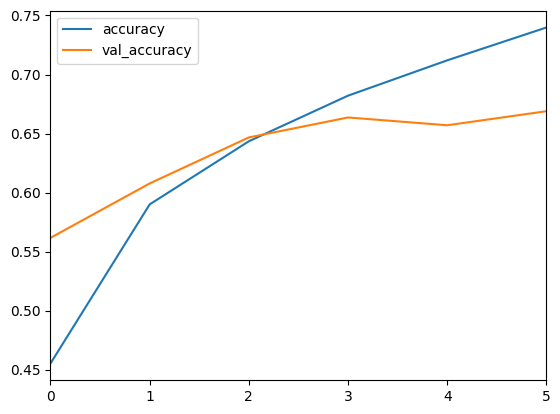

In [22]:
metrics[['accuracy','val_accuracy']].plot()

In [23]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.9667432622909546, 0.6689]

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
predictions = model.predict_classes(x_test)

In [26]:
y_cat_test.shape

(10000, 10)

In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.65      0.70      1000
           1       0.82      0.77      0.80      1000
           2       0.62      0.48      0.54      1000
           3       0.51      0.43      0.47      1000
           4       0.51      0.75      0.60      1000
           5       0.64      0.51      0.57      1000
           6       0.64      0.82      0.72      1000
           7       0.72      0.73      0.73      1000
           8       0.77      0.77      0.77      1000
           9       0.76      0.78      0.77      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [29]:
confusion_matrix(y_test,predictions)

array([[648,  22,  54,  27,  47,  14,  21,  13, 109,  45],
       [ 23, 773,   5,  10,  10,   6,  31,  11,  36,  95],
       [ 52,   8, 483,  54, 195,  44, 100,  39,  13,  12],
       [  9,   7,  53, 430, 141, 139, 128,  55,  17,  21],
       [ 14,   4,  41,  34, 749,  17,  64,  62,  12,   3],
       [ 10,   7,  59, 167, 107, 510,  64,  63,   3,  10],
       [  1,   3,  32,  41,  77,  11, 818,  10,   4,   3],
       [  9,   3,  25,  39, 115,  46,  14, 731,   4,  14],
       [ 53,  38,  14,  21,  25,   8,  21,   8, 769,  43],
       [ 26,  78,  12,  16,  11,   7,  22,  19,  31, 778]])

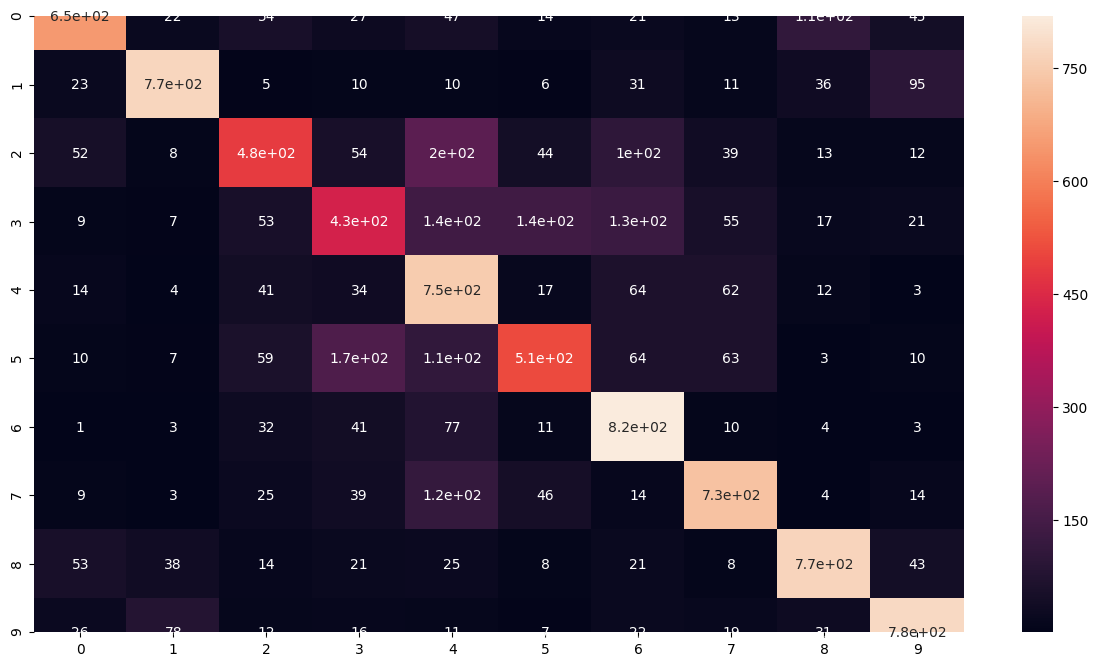

In [30]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [31]:
my_number = x_test[0]

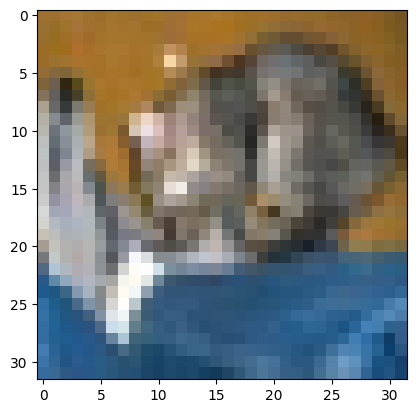

In [33]:
plt.imshow(my_number.reshape(32,32,3))

In [34]:
# num_images, width, height, color_channels
model.predict_classes(my_number.reshape(1,32,32,3))

array([3])